In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# First, we set up our input and output variables. In this case, quality and service are fuzzy input variables
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 31, 1), 'tip')

# Then, we set up the triangular membership function of quality and service.
quality.automf(3)
service.automf(3)

# .trimf is used for customising the fuzzy output variable tip and generate triangular membership function
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 30])
tip['high'] = fuzz.trimf(tip.universe, [13, 30, 30])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


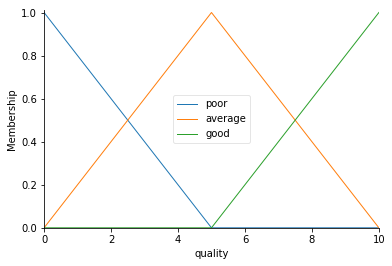

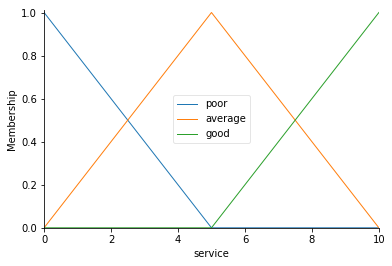

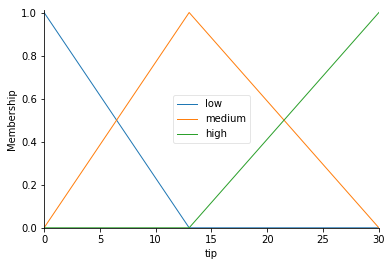

In [2]:
# We can see the membership function diagram of each fuzzy variable with .view()
quality.view()
service.view()
tip.view()

In [3]:
# We can make customised rules between inputs and outputs by using ctrl.Rule. Here are the example of three rules.
# 1. IF quality is "poor" or service is "poor", THEN tip is "low"
# 2. IF service is "average", THEN tip is "medium"
# 3. IF service is "good" or "quality" is good, THEN tip is "high"
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

In [4]:
# Now we buid up the control system "tipping" and conduct simulation
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [5]:
# Now we can set input variables quality and service
tipping.input['quality'] = 5
tipping.input['service'] = 8

# Calculate the values of output variable tip
tipping.compute()

17.526521133302367


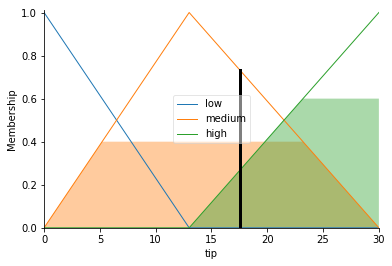

In [6]:
# We can also view the fuzzy output area and see the value of tip
print(tipping.output['tip'])
tip.view(sim=tipping)